If you want to run this colab please follow the instructions below

1. Download and upload the data from https://drive.google.com/drive/u/1/folders/1TcE9NNShm0irVqZM7y4Xtz7ibjHF9tAo to the colab (Data science project 2020/Data science project1/PM2.5_kaggle_2021)

2. Unzip the uploaded folder by typing the zip file name in cell 1 and rename foler after unzip to 'PM2.5_kaggle_2021'

3. Edit path in cell 3 to '/content/PM2.5_kaggle_2021'

In [ ]:
# !unzip

In [ ]:
import os
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import math
import datetime
from math import pi
import seaborn as sns
import datetime as dt

In [ ]:
path = '/content/drive/Shareddrives/Data science project/PM2.5_kaggle_2021'

# Data exploration

## PM2.5, wind and temperature

### Bangkok

In [ ]:
bkk_pm_train = pd.read_csv(os.path.join(path, 'Bangkok/Train/Bangkok.txt'), delimiter = '\t', skiprows=10, header=None,
            names=['year', 'month', 'day', 'UTC hour', 'PM2.5', 'PM10_mask', 'Retrospective'])        
bkk_pm_train.head(5)

,year,month,day,UTC hour,PM2.5,PM10_mask,Retrospective
0,2016,3,3,8,62.9,1.0,0
1,2016,3,3,9,62.9,1.0,0
2,2016,3,3,10,55.5,1.0,0
3,2016,3,3,11,55.5,1.0,0
4,2016,3,3,12,47.9,1.0,0


In [ ]:
bkk_pm_test = pd.read_csv(os.path.join(path, 'Bangkok/Test/Bangkok.csv'), skiprows=1,
                            names=['datetime', 'PM2.5'])
bkk_pm_test.head(5)

,datetime,PM2.5
0,2019-03-18 08:00:00,45.6
1,2019-03-18 09:00:00,46.6
2,2019-03-18 10:00:00,47.7
3,2019-03-18 11:00:00,43.7
4,2019-03-18 12:00:00,41.6


In [ ]:
bkk_pm_train['datetime'] = pd.to_datetime({'year': bkk_pm_train['year'], 'month': bkk_pm_train['month'], 'day':bkk_pm_train['day'],'hour': bkk_pm_train['UTC hour']})
drop_columns = ['year', 'month', 'day', 'UTC hour']
bkk_pm_train = bkk_pm_train.drop(drop_columns, axis=1)

bkk_pm_train['datetime'] = bkk_pm_train['datetime'].dt.tz_localize('UTC').dt.tz_convert('Asia/Bangkok')
bkk_pm_train['datetime'] = bkk_pm_train['datetime'].dt.tz_localize(None)
bkk_pm_train.head(5)

,PM2.5,PM10_mask,Retrospective,datetime
0,62.9,1.0,0,2016-03-03 15:00:00
1,62.9,1.0,0,2016-03-03 16:00:00
2,55.5,1.0,0,2016-03-03 17:00:00
3,55.5,1.0,0,2016-03-03 18:00:00
4,47.9,1.0,0,2016-03-03 19:00:00


In [ ]:
bkk_pm_train.tail(5)

,PM2.5,PM10_mask,Retrospective,datetime
24388,42.2,0.0,0,2019-03-18 02:00:00
24389,41.2,0.0,0,2019-03-18 03:00:00
24390,37.7,0.0,0,2019-03-18 04:00:00
24391,39.0,0.0,0,2019-03-18 05:00:00
24392,38.9,0.0,0,2019-03-18 06:00:00


In [ ]:
bkk_pm_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8797 entries, 0 to 8796
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   datetime  8797 non-null   object 
 1   PM2.5     8797 non-null   float64
dtypes: float64(1), object(1)
memory usage: 137.6+ KB


In [ ]:
bkk_pm_test['datetime'] = pd.to_datetime(bkk_pm_test['datetime'])

bkk_pm_train = bkk_pm_train.set_index('datetime')
bkk_pm_test = bkk_pm_test.set_index('datetime')

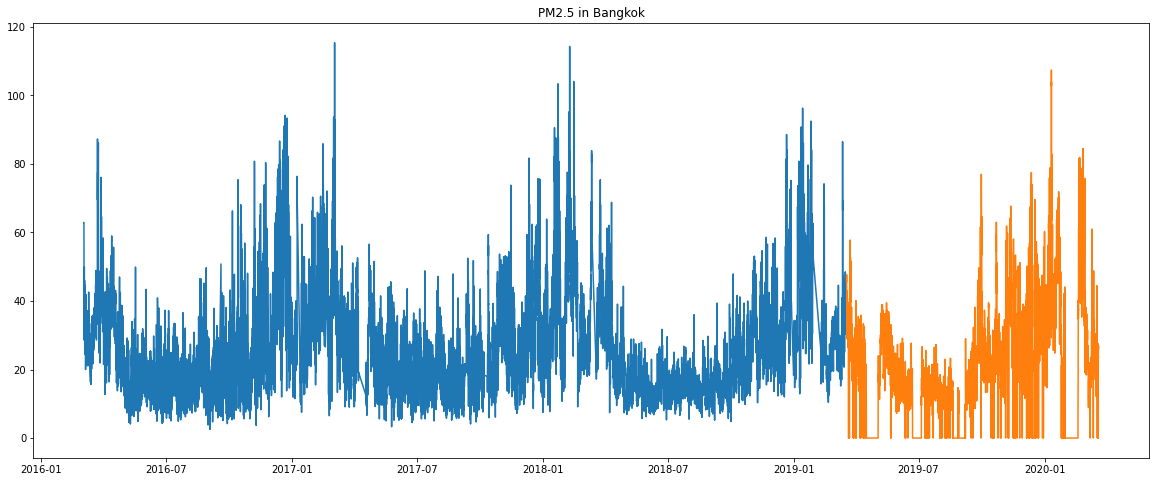

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(bkk_pm_train['PM2.5'])
plt.plot(bkk_pm_test['PM2.5'])
plt.title('PM2.5 in Bangkok')
plt.show()

In [ ]:
bkk_pm_train = bkk_pm_train.reset_index()
bkk_pm_train['day_of_year'] = bkk_pm_train['datetime'].dt.dayofyear
bkk_pm_train['day_of_week'] = bkk_pm_train['datetime'].dt.dayofweek
bkk_pm_train['hour'] = bkk_pm_train['datetime'].dt.hour
bkk_pm_train = bkk_pm_train.set_index('datetime')
bkk_pm_train.head(5)

,PM2.5,PM10_mask,Retrospective,day_of_year,day_of_week,hour
datetime,,,,,,
2016-03-03 15:00:00,62.9,1.0,0,63,3,15
2016-03-03 16:00:00,62.9,1.0,0,63,3,16
2016-03-03 17:00:00,55.5,1.0,0,63,3,17
2016-03-03 18:00:00,55.5,1.0,0,63,3,18
2016-03-03 19:00:00,47.9,1.0,0,63,3,19


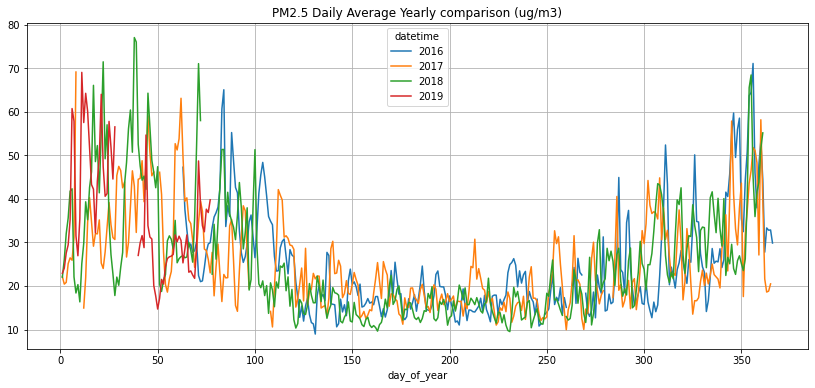

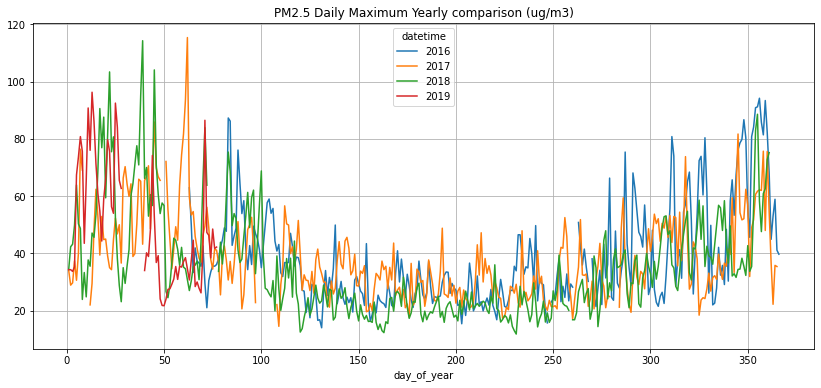

In [ ]:
pv = pd.pivot_table(bkk_pm_train, index=bkk_pm_train['day_of_year'], columns=bkk_pm_train.index.year, values='PM2.5', aggfunc='mean')
pv.plot(title="PM2.5 Daily Average Yearly comparison (ug/m3)",figsize=(14,6), grid=True)

pv2 = pd.pivot_table(bkk_pm_train, index=bkk_pm_train['day_of_year'], columns=bkk_pm_train.index.year, values='PM2.5', aggfunc='max')
pv2.plot(title="PM2.5 Daily Maximum Yearly comparison (ug/m3)",figsize=(14,6), grid=True)

plt.show()

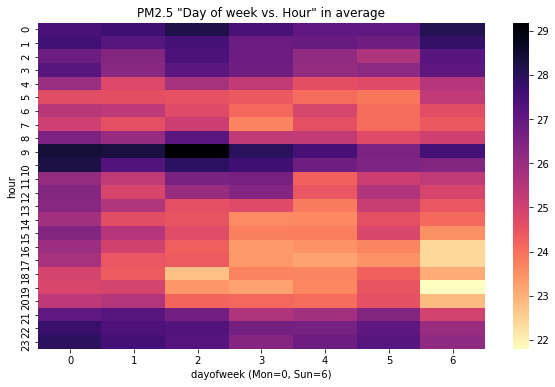

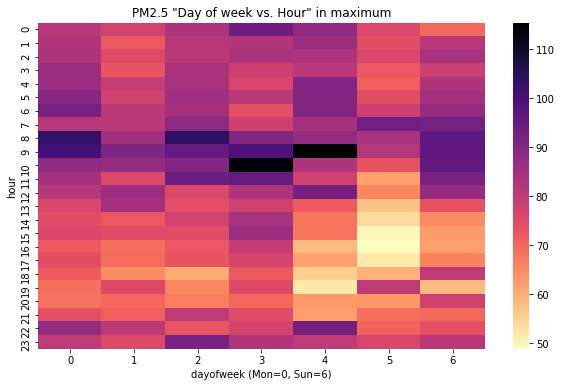

In [ ]:
fig, ax = plt.subplots(figsize=(10,6)) 
hrvsday = bkk_pm_train.pivot_table(values='PM2.5',index='hour',columns='day_of_week',aggfunc='mean')
ax.set_title('PM2.5 "Day of week vs. Hour" in average')
sns.heatmap(hrvsday,cmap='magma_r', ax=ax)
ax.set_xlabel('dayofweek (Mon=0, Sun=6)')

fig, ax = plt.subplots(figsize=(10,6)) 
hrvsday = bkk_pm_train.pivot_table(values='PM2.5',index='hour',columns='day_of_week',aggfunc='max')
ax.set_title('PM2.5 "Day of week vs. Hour" in maximum')
sns.heatmap(hrvsday,cmap='magma_r', ax=ax)
ax.set_xlabel('dayofweek (Mon=0, Sun=6)')

plt.show()

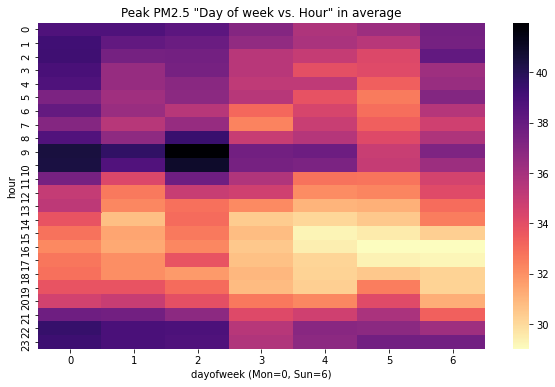

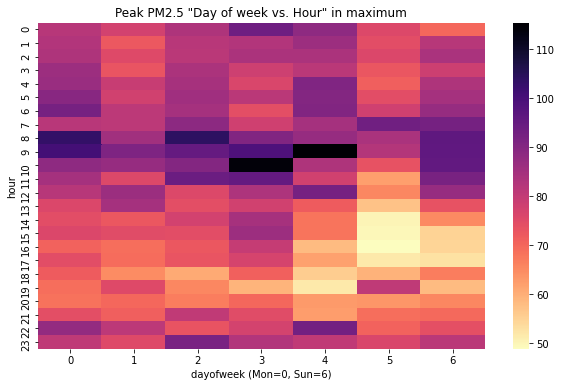

In [ ]:
peak_months = bkk_pm_train.loc[(bkk_pm_train.index.month == 12) | (bkk_pm_train.index.month <= 4)]
fig, ax = plt.subplots(figsize=(10,6)) 
hrvsday = peak_months.pivot_table(values='PM2.5',index='hour',columns='day_of_week',aggfunc='mean')
ax.set_title('Peak PM2.5 "Day of week vs. Hour" in average')
sns.heatmap(hrvsday,cmap='magma_r', ax=ax)
ax.set_xlabel('dayofweek (Mon=0, Sun=6)')

peak_months = bkk_pm_train.loc[(bkk_pm_train.index.month == 12) | (bkk_pm_train.index.month <= 4)]
fig, ax = plt.subplots(figsize=(10,6)) 
hrvsday = peak_months.pivot_table(values='PM2.5',index='hour',columns='day_of_week',aggfunc='max')
ax.set_title('Peak PM2.5 "Day of week vs. Hour" in maximum')
sns.heatmap(hrvsday,cmap='magma_r', ax=ax)
ax.set_xlabel('dayofweek (Mon=0, Sun=6)')

plt.show()

In [ ]:
bkk_temp = pd.read_csv(os.path.join(path, 'Bangkok/Train/3H_temperature_Bangkok.csv'))
bkk_temp['datetime'] = pd.to_datetime(bkk_temp['datetime'])
bkk_temp = bkk_temp.set_index('datetime')
bkk_temp = bkk_temp.rename(columns={'Temp(C)': 'Temp'})
bkk_temp.head(5)

,Temp,lat,long
datetime,,,
2016-03-03 01:00:00,25.5,13.754,100.5014
2016-03-03 04:00:00,25.0,13.754,100.5014
2016-03-03 07:00:00,26.4,13.754,100.5014
2016-03-03 10:00:00,31.4,13.754,100.5014
2016-03-03 13:00:00,34.1,13.754,100.5014


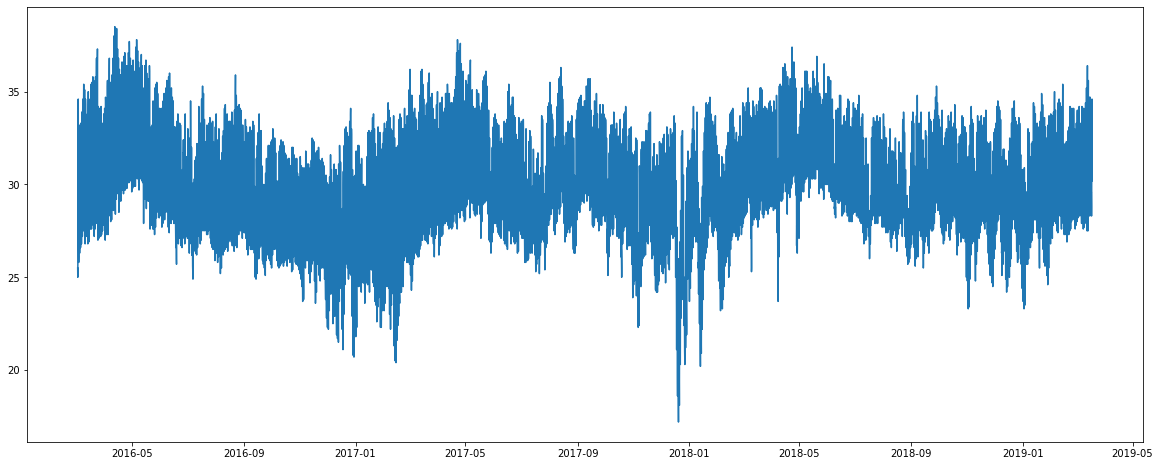

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(bkk_temp['Temp'])
plt.show()

In [ ]:
bkk_wind = pd.read_csv(os.path.join(path, 'Bangkok/Train/3H_wind_Bangkok.csv'))
bkk_wind['datetime'] = pd.to_datetime(bkk_wind['datetime'])
bkk_wind = bkk_wind.set_index('datetime')
bkk_wind.head(5)

,WindDir,Wind Speed(km/h),lat,long
datetime,,,,
2016-03-03 01:00:00,45,13,13.754,100.5014
2016-03-03 04:00:00,60,11,13.754,100.5014
2016-03-03 07:00:00,65,15,13.754,100.5014
2016-03-03 10:00:00,75,13,13.754,100.5014
2016-03-03 13:00:00,70,12,13.754,100.5014


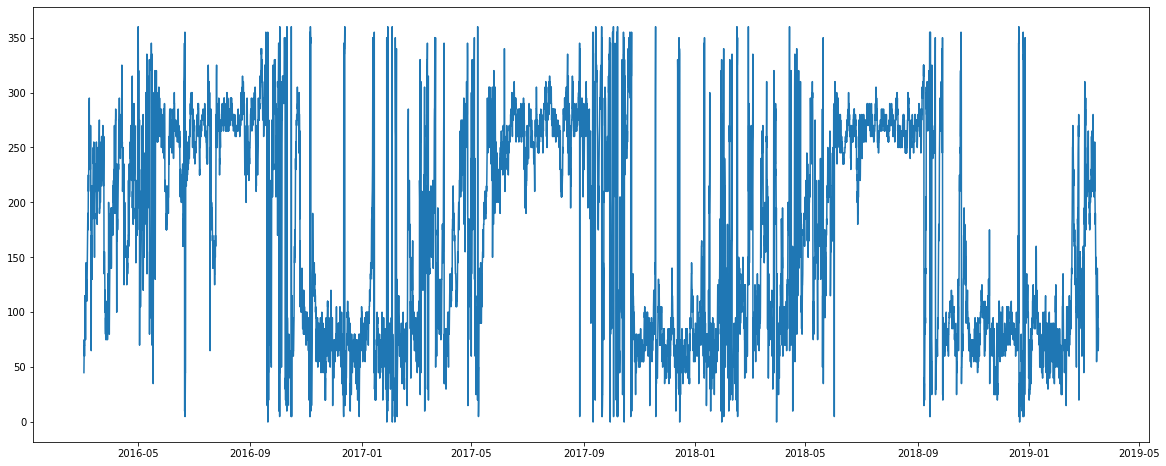

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(bkk_wind['WindDir'])
plt.show()

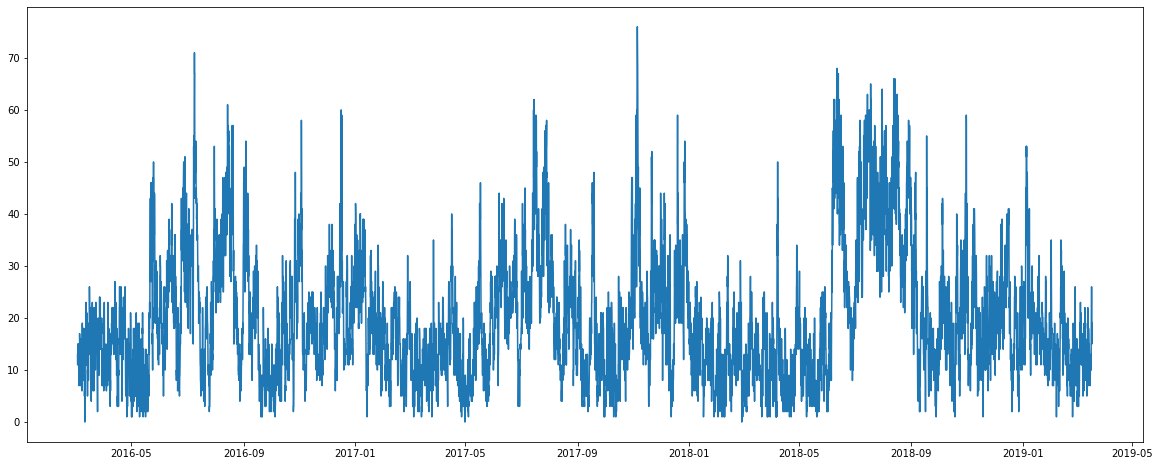

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(bkk_wind['Wind Speed(km/h)'])
plt.show()

### Chanthaburi

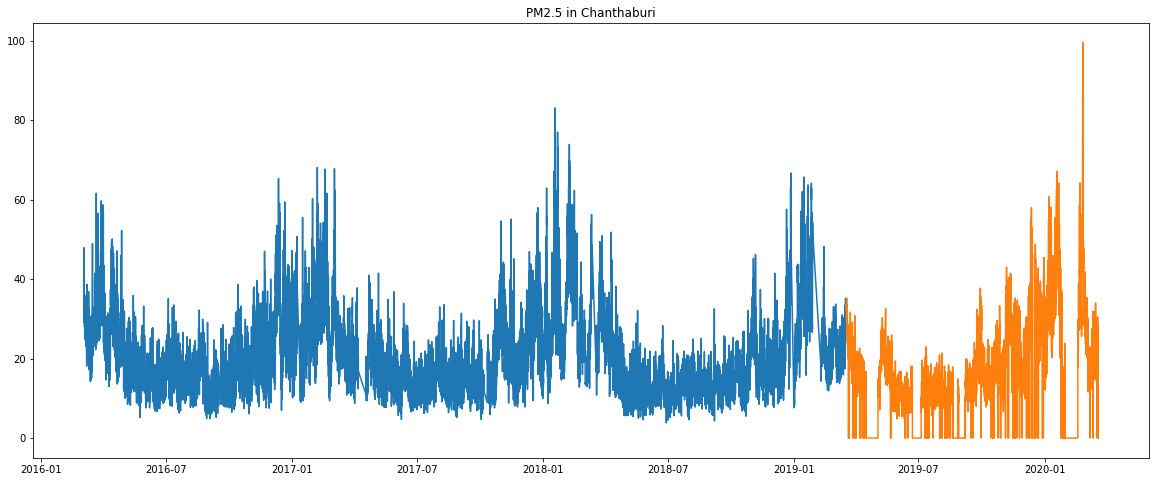

In [ ]:
cti_pm_train = pd.read_csv(os.path.join(path, 'Chanthaburi/Train/Chanthaburi.txt'), delimiter = '\t', skiprows=10, header=None,
            names=['year', 'month', 'day', 'UTC hour', 'PM2.5', 'PM10_mask', 'Retrospective'])
cti_pm_train['datetime'] = pd.to_datetime({'year': cti_pm_train['year'], 'month': cti_pm_train['month'], 'day':cti_pm_train['day'],'hour': cti_pm_train['UTC hour']})
drop_columns = ['year', 'month', 'day', 'UTC hour']
cti_pm_train = cti_pm_train.drop(drop_columns, axis=1)
cti_pm_train['datetime'] = cti_pm_train['datetime'].dt.tz_localize('UTC').dt.tz_convert('Asia/Bangkok')
cti_pm_train['datetime'] = cti_pm_train['datetime'].dt.tz_localize(None)
cti_pm_train = cti_pm_train.set_index('datetime')

cti_pm_test = pd.read_csv(os.path.join(path, 'Chanthaburi/Test/Chanthaburi.csv'), skiprows=1,
                            names=['datetime', 'PM2.5'])
cti_pm_test['datetime'] = pd.to_datetime(cti_pm_test['datetime'])
cti_pm_test = cti_pm_test.set_index('datetime')

plt.figure(figsize=(20,8))
plt.plot(cti_pm_train['PM2.5'])
plt.plot(cti_pm_test['PM2.5'])
plt.title('PM2.5 in Chanthaburi')
plt.show()

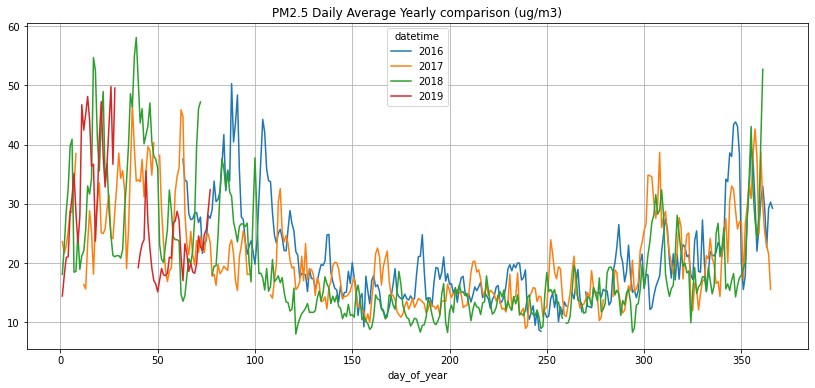

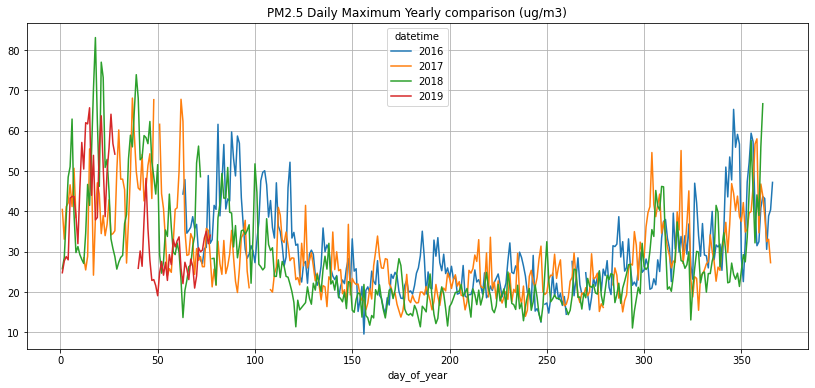

In [ ]:
cti_pm_train = cti_pm_train.reset_index()
cti_pm_train['day_of_year'] = cti_pm_train['datetime'].dt.dayofyear
cti_pm_train['day_of_week'] = cti_pm_train['datetime'].dt.dayofweek
cti_pm_train['hour'] = cti_pm_train['datetime'].dt.hour
cti_pm_train = cti_pm_train.set_index('datetime')

pv = pd.pivot_table(cti_pm_train, index=cti_pm_train['day_of_year'], columns=cti_pm_train.index.year, values='PM2.5', aggfunc='mean')
pv.plot(title="PM2.5 Daily Average Yearly comparison (ug/m3)",figsize=(14,6), grid=True)

pv2 = pd.pivot_table(cti_pm_train, index=cti_pm_train['day_of_year'], columns=cti_pm_train.index.year, values='PM2.5', aggfunc='max')
pv2.plot(title="PM2.5 Daily Maximum Yearly comparison (ug/m3)",figsize=(14,6), grid=True)

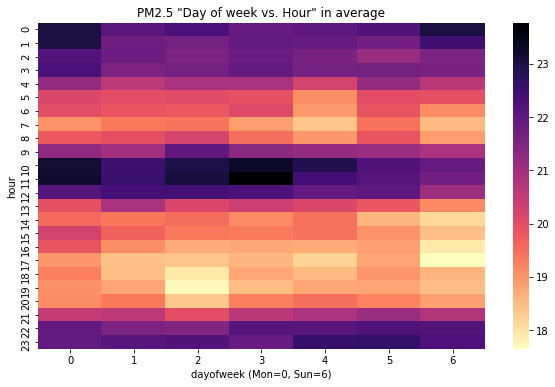

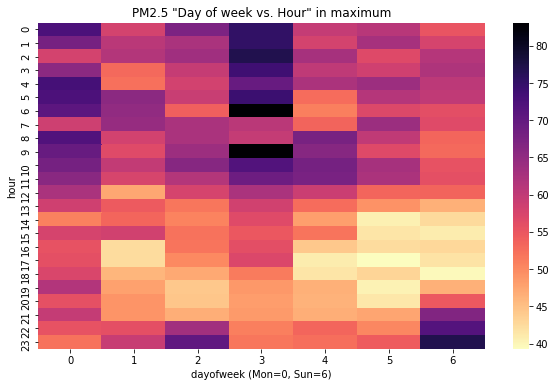

In [ ]:
fig, ax = plt.subplots(figsize=(10,6)) 
hrvsday = cti_pm_train.pivot_table(values='PM2.5',index='hour',columns='day_of_week',aggfunc='mean')
ax.set_title('PM2.5 "Day of week vs. Hour" in average')
sns.heatmap(hrvsday,cmap='magma_r', ax=ax)
ax.set_xlabel('dayofweek (Mon=0, Sun=6)')

fig, ax = plt.subplots(figsize=(10,6)) 
hrvsday = cti_pm_train.pivot_table(values='PM2.5',index='hour',columns='day_of_week',aggfunc='max')
ax.set_title('PM2.5 "Day of week vs. Hour" in maximum')
sns.heatmap(hrvsday,cmap='magma_r', ax=ax)
ax.set_xlabel('dayofweek (Mon=0, Sun=6)')

plt.show()

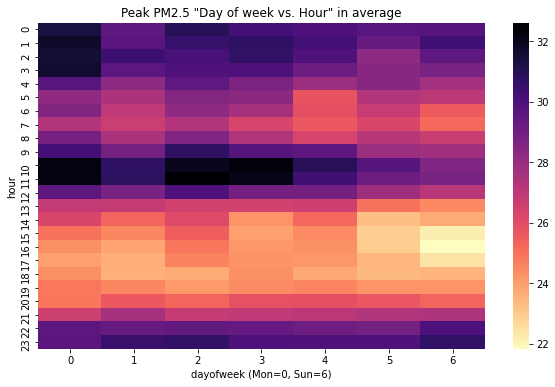

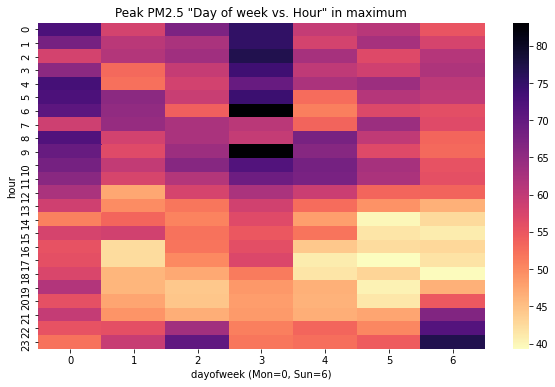

In [ ]:
peak_months = cti_pm_train.loc[(cti_pm_train.index.month == 12) | (cti_pm_train.index.month <= 4)]
fig, ax = plt.subplots(figsize=(10,6)) 
hrvsday = peak_months.pivot_table(values='PM2.5',index='hour',columns='day_of_week',aggfunc='mean')
ax.set_title('Peak PM2.5 "Day of week vs. Hour" in average')
sns.heatmap(hrvsday,cmap='magma_r', ax=ax)
ax.set_xlabel('dayofweek (Mon=0, Sun=6)')

peak_months = cti_pm_train.loc[(cti_pm_train.index.month == 12) | (cti_pm_train.index.month <= 4)]
fig, ax = plt.subplots(figsize=(10,6)) 
hrvsday = peak_months.pivot_table(values='PM2.5',index='hour',columns='day_of_week',aggfunc='max')
ax.set_title('Peak PM2.5 "Day of week vs. Hour" in maximum')
sns.heatmap(hrvsday,cmap='magma_r', ax=ax)
ax.set_xlabel('dayofweek (Mon=0, Sun=6)')

plt.show()

### Chiang Mai

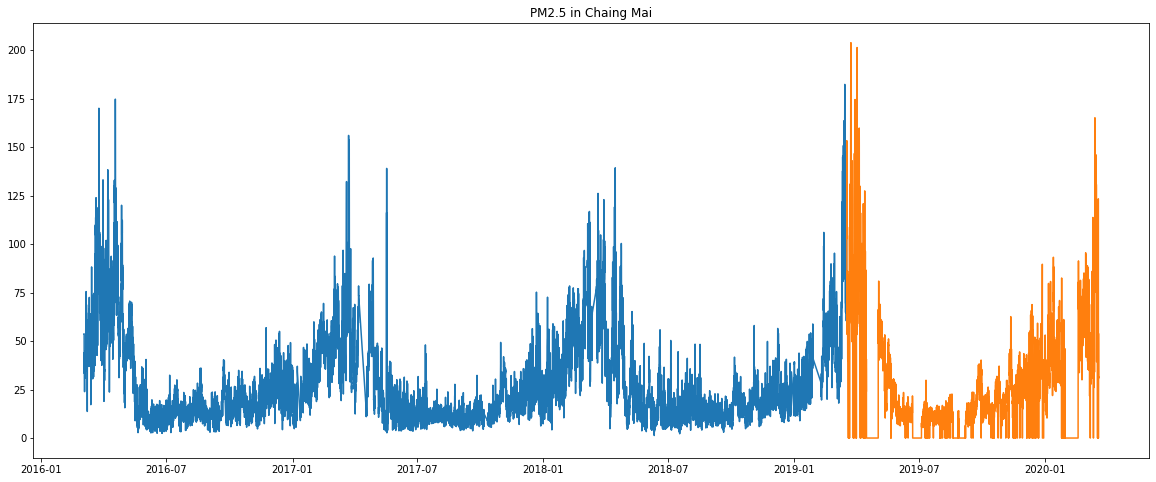

In [ ]:
cmi_pm_train = pd.read_csv(os.path.join(path, 'Chiang Mai/Train/Chiang Mai.txt'), delimiter = '\t', skiprows=10, header=None,
            names=['year', 'month', 'day', 'UTC hour', 'PM2.5', 'PM10_mask', 'Retrospective'])
cmi_pm_train['datetime'] = pd.to_datetime({'year': cmi_pm_train['year'], 'month': cmi_pm_train['month'], 'day':cmi_pm_train['day'],'hour': cmi_pm_train['UTC hour']})
drop_columns = ['year', 'month', 'day', 'UTC hour']
cmi_pm_train = cmi_pm_train.drop(drop_columns, axis=1)
cmi_pm_train['datetime'] = cmi_pm_train['datetime'].dt.tz_localize('UTC').dt.tz_convert('Asia/Bangkok')
cmi_pm_train['datetime'] = cmi_pm_train['datetime'].dt.tz_localize(None)
cmi_pm_train = cmi_pm_train.set_index('datetime')

cmi_pm_test = pd.read_csv(os.path.join(path, 'Chiang Mai/Test/Chiang Mai.csv'), skiprows=1,
                            names=['datetime', 'PM2.5'])
cmi_pm_test['datetime'] = pd.to_datetime(cmi_pm_test['datetime'])
cmi_pm_test = cmi_pm_test.set_index('datetime')

plt.figure(figsize=(20,8))
plt.plot(cmi_pm_train['PM2.5'])
plt.plot(cmi_pm_test['PM2.5'])
plt.title('PM2.5 in Chaing Mai')
plt.show()

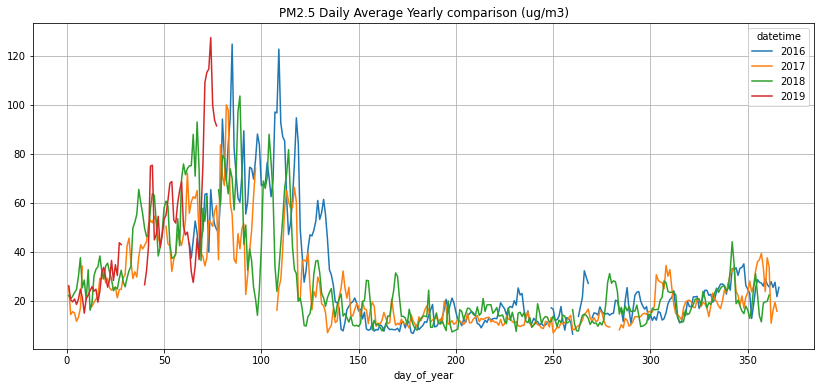

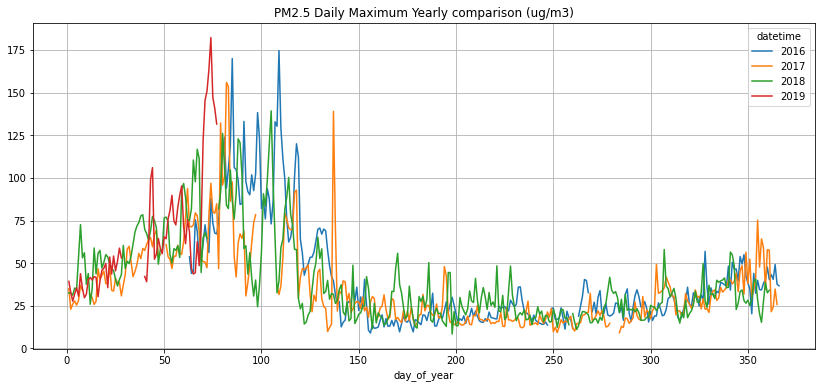

In [ ]:
cmi_pm_train = cmi_pm_train.reset_index()
cmi_pm_train['day_of_year'] = cmi_pm_train['datetime'].dt.dayofyear
cmi_pm_train['day_of_week'] = cmi_pm_train['datetime'].dt.dayofweek
cmi_pm_train['hour'] = cmi_pm_train['datetime'].dt.hour
cmi_pm_train = cmi_pm_train.set_index('datetime')

pv = pd.pivot_table(cmi_pm_train, index=cmi_pm_train['day_of_year'], columns=cmi_pm_train.index.year, values='PM2.5', aggfunc='mean')
pv.plot(title="PM2.5 Daily Average Yearly comparison (ug/m3)",figsize=(14,6), grid=True)

pv2 = pd.pivot_table(cmi_pm_train, index=cmi_pm_train['day_of_year'], columns=cmi_pm_train.index.year, values='PM2.5', aggfunc='max')
pv2.plot(title="PM2.5 Daily Maximum Yearly comparison (ug/m3)",figsize=(14,6), grid=True)

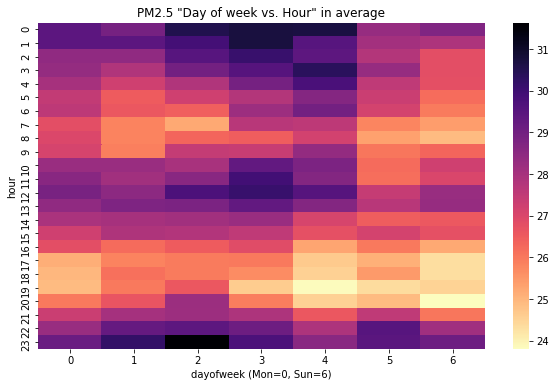

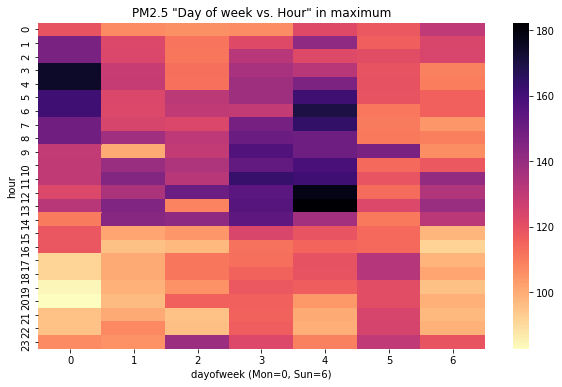

In [ ]:
fig, ax = plt.subplots(figsize=(10,6)) 
hrvsday = cmi_pm_train.pivot_table(values='PM2.5',index='hour',columns='day_of_week',aggfunc='mean')
ax.set_title('PM2.5 "Day of week vs. Hour" in average')
sns.heatmap(hrvsday,cmap='magma_r', ax=ax)
ax.set_xlabel('dayofweek (Mon=0, Sun=6)')

fig, ax = plt.subplots(figsize=(10,6)) 
hrvsday = cmi_pm_train.pivot_table(values='PM2.5',index='hour',columns='day_of_week',aggfunc='max')
ax.set_title('PM2.5 "Day of week vs. Hour" in maximum')
sns.heatmap(hrvsday,cmap='magma_r', ax=ax)
ax.set_xlabel('dayofweek (Mon=0, Sun=6)')

plt.show()

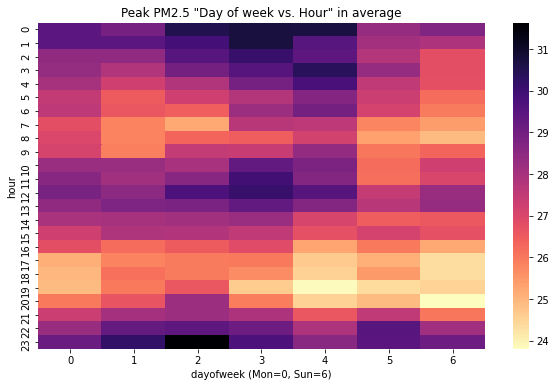

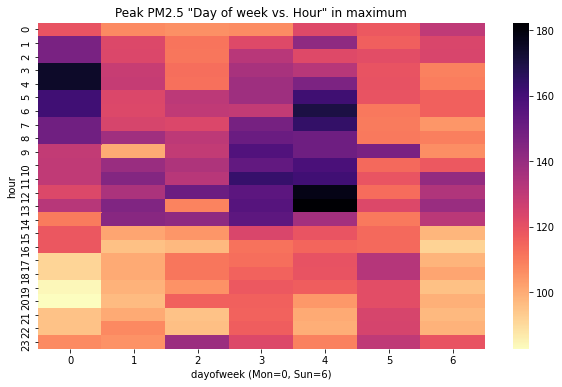

In [ ]:
peak_months = cmi_pm_train.loc[(cmi_pm_train.index.month >= 2) | (cmi_pm_train.index.month <= 4)]
fig, ax = plt.subplots(figsize=(10,6)) 
hrvsday = peak_months.pivot_table(values='PM2.5',index='hour',columns='day_of_week',aggfunc='mean')
ax.set_title('Peak PM2.5 "Day of week vs. Hour" in average')
sns.heatmap(hrvsday,cmap='magma_r', ax=ax)
ax.set_xlabel('dayofweek (Mon=0, Sun=6)')

peak_months = cmi_pm_train.loc[(cmi_pm_train.index.month >= 2) | (cmi_pm_train.index.month <= 4)]
fig, ax = plt.subplots(figsize=(10,6)) 
hrvsday = peak_months.pivot_table(values='PM2.5',index='hour',columns='day_of_week',aggfunc='max')
ax.set_title('Peak PM2.5 "Day of week vs. Hour" in maximum')
sns.heatmap(hrvsday,cmap='magma_r', ax=ax)
ax.set_xlabel('dayofweek (Mon=0, Sun=6)')

plt.show()

### Kanchanaburi

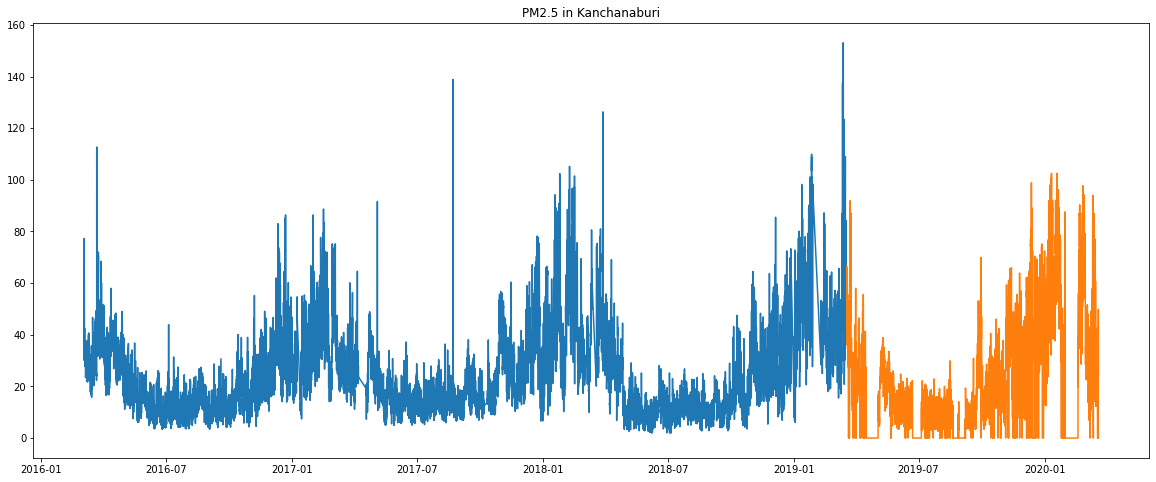

In [ ]:
kri_pm_train = pd.read_csv(os.path.join(path, 'Kanchanaburi/Train/Kanchanaburi.txt'), delimiter = '\t', skiprows=10, header=None,
            names=['year', 'month', 'day', 'UTC hour', 'PM2.5', 'PM10_mask', 'Retrospective'])
kri_pm_train['datetime'] = pd.to_datetime({'year': kri_pm_train['year'], 'month': kri_pm_train['month'], 'day':kri_pm_train['day'],'hour': kri_pm_train['UTC hour']})
drop_columns = ['year', 'month', 'day', 'UTC hour']
kri_pm_train = kri_pm_train.drop(drop_columns, axis=1)
kri_pm_train['datetime'] = kri_pm_train['datetime'].dt.tz_localize('UTC').dt.tz_convert('Asia/Bangkok')
kri_pm_train['datetime'] = kri_pm_train['datetime'].dt.tz_localize(None)
kri_pm_train = kri_pm_train.set_index('datetime')

kri_pm_test = pd.read_csv(os.path.join(path, 'Kanchanaburi/Test/Kanchanaburi.csv'), skiprows=1,
                            names=['datetime', 'PM2.5'])
kri_pm_test['datetime'] = pd.to_datetime(kri_pm_test['datetime'])
kri_pm_test = kri_pm_test.set_index('datetime')

plt.figure(figsize=(20,8))
plt.plot(kri_pm_train['PM2.5'])
plt.plot(kri_pm_test['PM2.5'])
plt.title('PM2.5 in Kanchanaburi')
plt.show()

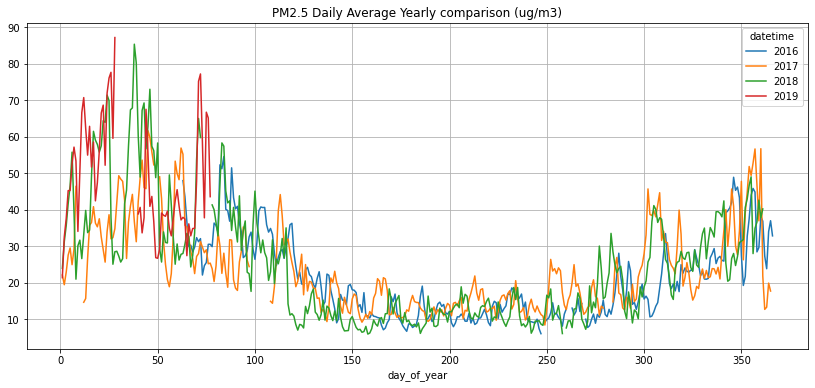

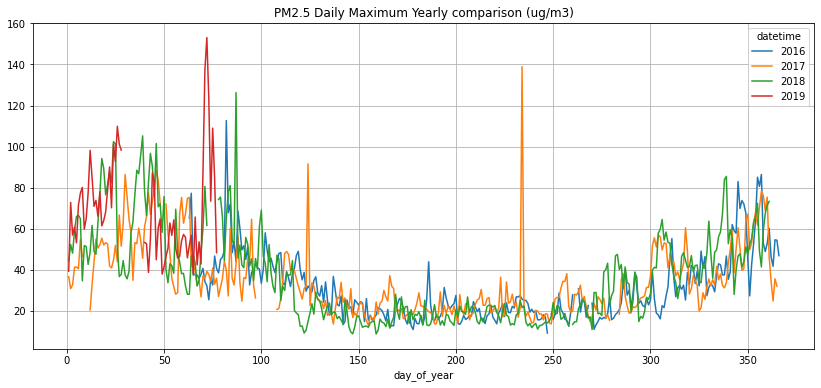

In [ ]:
kri_pm_train = kri_pm_train.reset_index()
kri_pm_train['day_of_year'] = kri_pm_train['datetime'].dt.dayofyear
kri_pm_train['day_of_week'] = kri_pm_train['datetime'].dt.dayofweek
kri_pm_train['hour'] = kri_pm_train['datetime'].dt.hour
kri_pm_train = kri_pm_train.set_index('datetime')

pv = pd.pivot_table(kri_pm_train, index=kri_pm_train['day_of_year'], columns=kri_pm_train.index.year, values='PM2.5', aggfunc='mean')
pv.plot(title="PM2.5 Daily Average Yearly comparison (ug/m3)",figsize=(14,6), grid=True)

pv2 = pd.pivot_table(kri_pm_train, index=kri_pm_train['day_of_year'], columns=kri_pm_train.index.year, values='PM2.5', aggfunc='max')
pv2.plot(title="PM2.5 Daily Maximum Yearly comparison (ug/m3)",figsize=(14,6), grid=True)

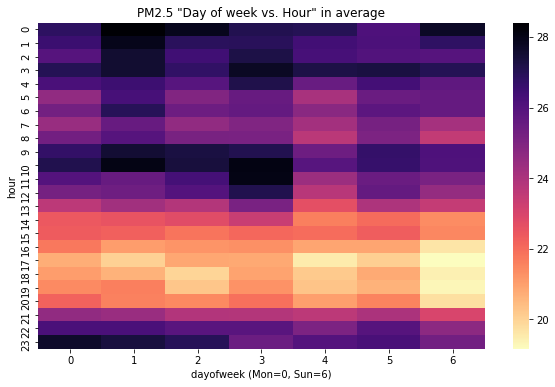

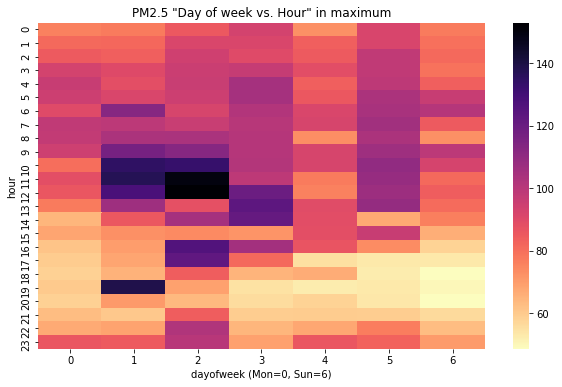

In [ ]:
fig, ax = plt.subplots(figsize=(10,6)) 
hrvsday = kri_pm_train.pivot_table(values='PM2.5',index='hour',columns='day_of_week',aggfunc='mean')
ax.set_title('PM2.5 "Day of week vs. Hour" in average')
sns.heatmap(hrvsday,cmap='magma_r', ax=ax)
ax.set_xlabel('dayofweek (Mon=0, Sun=6)')

fig, ax = plt.subplots(figsize=(10,6)) 
hrvsday = kri_pm_train.pivot_table(values='PM2.5',index='hour',columns='day_of_week',aggfunc='max')
ax.set_title('PM2.5 "Day of week vs. Hour" in maximum')
sns.heatmap(hrvsday,cmap='magma_r', ax=ax)
ax.set_xlabel('dayofweek (Mon=0, Sun=6)')

plt.show()

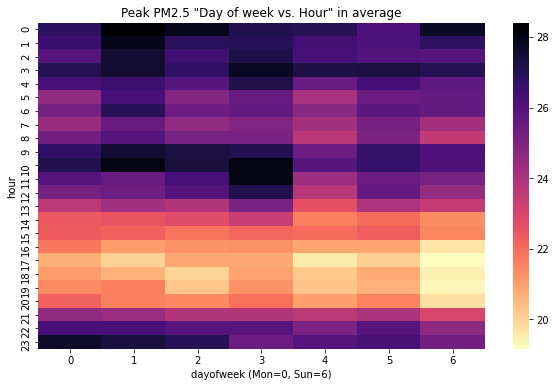

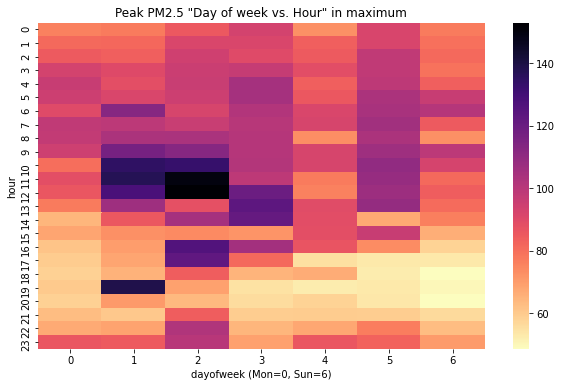

In [ ]:
peak_months = kri_pm_train.loc[(kri_pm_train.index.month >= 1) | (kri_pm_train.index.month <= 3)]
fig, ax = plt.subplots(figsize=(10,6)) 
hrvsday = peak_months.pivot_table(values='PM2.5',index='hour',columns='day_of_week',aggfunc='mean')
ax.set_title('Peak PM2.5 "Day of week vs. Hour" in average')
sns.heatmap(hrvsday,cmap='magma_r', ax=ax)
ax.set_xlabel('dayofweek (Mon=0, Sun=6)')

peak_months = kri_pm_train.loc[(kri_pm_train.index.month >= 1) | (kri_pm_train.index.month <= 3)]
fig, ax = plt.subplots(figsize=(10,6)) 
hrvsday = peak_months.pivot_table(values='PM2.5',index='hour',columns='day_of_week',aggfunc='max')
ax.set_title('Peak PM2.5 "Day of week vs. Hour" in maximum')
sns.heatmap(hrvsday,cmap='magma_r', ax=ax)
ax.set_xlabel('dayofweek (Mon=0, Sun=6)')

plt.show()

### Khon Kaen

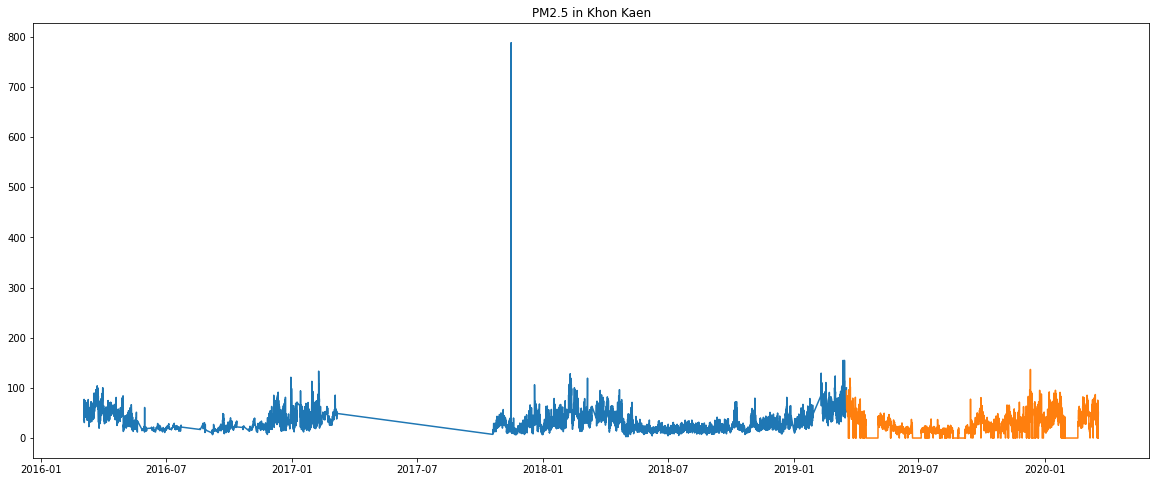

In [ ]:
kkn_pm_train = pd.read_csv(os.path.join(path, 'Khon Kaen/Train/Khon Kaen.txt'), delimiter = '\t', skiprows=10, header=None,
            names=['year', 'month', 'day', 'UTC hour', 'PM2.5', 'PM10_mask', 'Retrospective'])
kkn_pm_train['datetime'] = pd.to_datetime({'year': kkn_pm_train['year'], 'month': kkn_pm_train['month'], 'day':kkn_pm_train['day'],'hour': kkn_pm_train['UTC hour']})
drop_columns = ['year', 'month', 'day', 'UTC hour']
kkn_pm_train = kkn_pm_train.drop(drop_columns, axis=1)
kkn_pm_train['datetime'] = kkn_pm_train['datetime'].dt.tz_localize('UTC').dt.tz_convert('Asia/Bangkok')
kkn_pm_train['datetime'] = kkn_pm_train['datetime'].dt.tz_localize(None)
kkn_pm_train = kkn_pm_train.set_index('datetime')

kkn_pm_test = pd.read_csv(os.path.join(path, 'Khon Kaen/Test/Khon Kaen.csv'), skiprows=1,
                            names=['datetime', 'PM2.5'])
kkn_pm_test['datetime'] = pd.to_datetime(kkn_pm_test['datetime'])
kkn_pm_test = kkn_pm_test.set_index('datetime')

plt.figure(figsize=(20,8))
plt.plot(kkn_pm_train['PM2.5'])
plt.plot(kkn_pm_test['PM2.5'])
plt.title('PM2.5 in Khon Kaen')
plt.show()

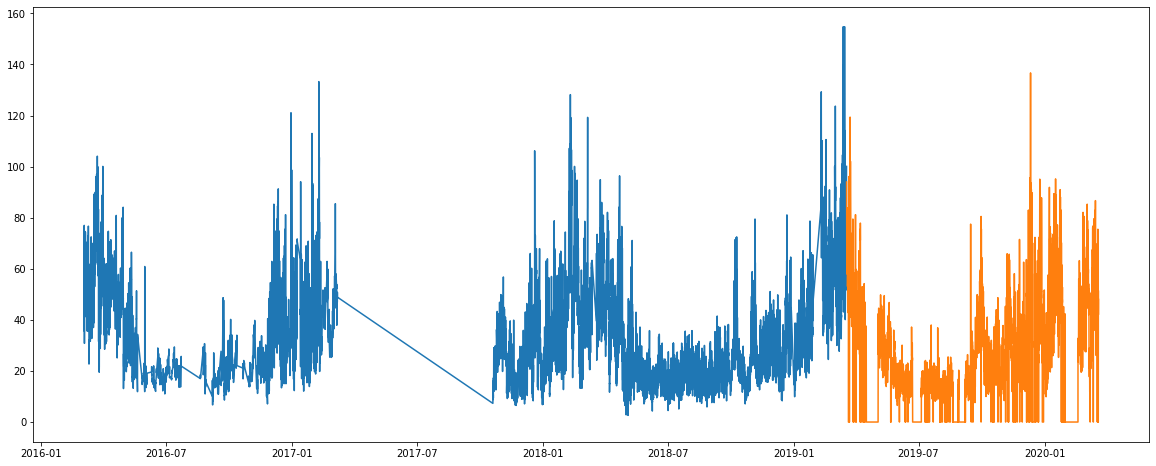

In [ ]:
kkn_pm_train.loc[kkn_pm_train['PM2.5'] > 500, 'PM2.5'] = kkn_pm_train['PM2.5'].mean()
plt.figure(figsize=(20,8))
plt.plot(kkn_pm_train['PM2.5'])
plt.plot(kkn_pm_test['PM2.5'])
plt.show()

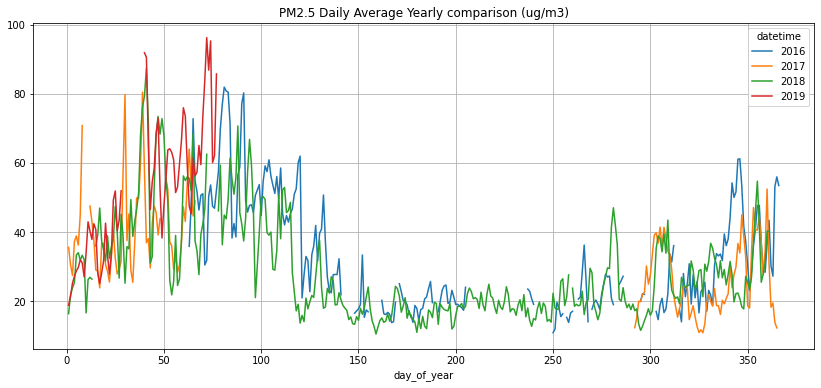

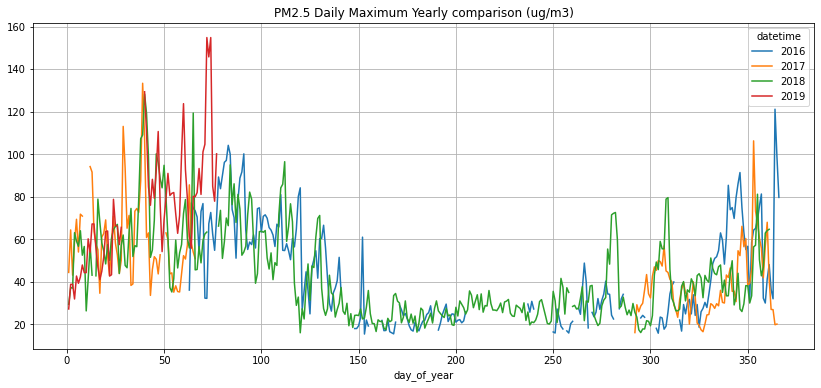

In [ ]:
kkn_pm_train = kkn_pm_train.reset_index()
kkn_pm_train['day_of_year'] = kkn_pm_train['datetime'].dt.dayofyear
kkn_pm_train['day_of_week'] = kkn_pm_train['datetime'].dt.dayofweek
kkn_pm_train['hour'] = kkn_pm_train['datetime'].dt.hour
kkn_pm_train = kkn_pm_train.set_index('datetime')

pv = pd.pivot_table(kkn_pm_train, index=kkn_pm_train['day_of_year'], columns=kkn_pm_train.index.year, values='PM2.5', aggfunc='mean')
pv.plot(title="PM2.5 Daily Average Yearly comparison (ug/m3)",figsize=(14,6), grid=True)

pv2 = pd.pivot_table(kkn_pm_train, index=kkn_pm_train['day_of_year'], columns=kkn_pm_train.index.year, values='PM2.5', aggfunc='max')
pv2.plot(title="PM2.5 Daily Maximum Yearly comparison (ug/m3)",figsize=(14,6), grid=True)

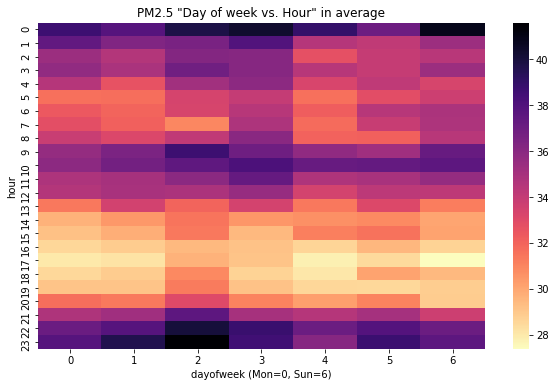

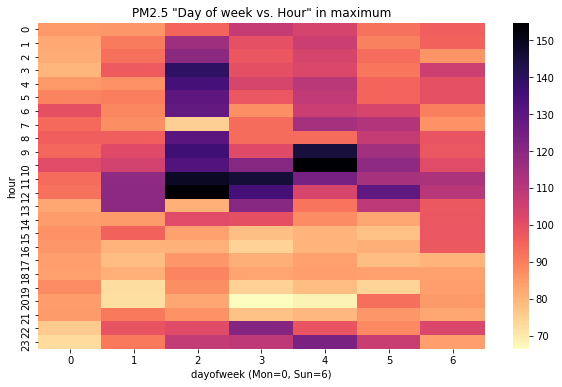

In [ ]:
fig, ax = plt.subplots(figsize=(10,6)) 
hrvsday = kkn_pm_train.pivot_table(values='PM2.5',index='hour',columns='day_of_week',aggfunc='mean')
ax.set_title('PM2.5 "Day of week vs. Hour" in average')
sns.heatmap(hrvsday,cmap='magma_r', ax=ax)
ax.set_xlabel('dayofweek (Mon=0, Sun=6)')

fig, ax = plt.subplots(figsize=(10,6)) 
hrvsday = kkn_pm_train.pivot_table(values='PM2.5',index='hour',columns='day_of_week',aggfunc='max')
ax.set_title('PM2.5 "Day of week vs. Hour" in maximum')
sns.heatmap(hrvsday,cmap='magma_r', ax=ax)
ax.set_xlabel('dayofweek (Mon=0, Sun=6)')

plt.show()

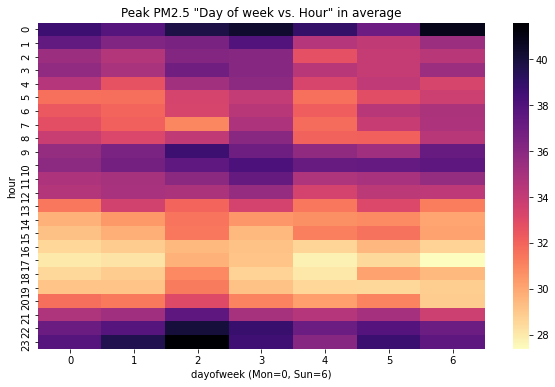

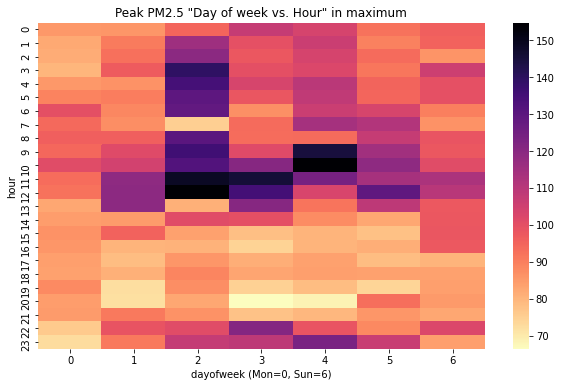

In [ ]:
peak_months = kkn_pm_train.loc[(kkn_pm_train.index.month >= 2) | (kkn_pm_train.index.month <= 3)]
fig, ax = plt.subplots(figsize=(10,6)) 
hrvsday = peak_months.pivot_table(values='PM2.5',index='hour',columns='day_of_week',aggfunc='mean')
ax.set_title('Peak PM2.5 "Day of week vs. Hour" in average')
sns.heatmap(hrvsday,cmap='magma_r', ax=ax)
ax.set_xlabel('dayofweek (Mon=0, Sun=6)')

peak_months = kkn_pm_train.loc[(kkn_pm_train.index.month >= 2) | (kkn_pm_train.index.month <= 3)]
fig, ax = plt.subplots(figsize=(10,6)) 
hrvsday = peak_months.pivot_table(values='PM2.5',index='hour',columns='day_of_week',aggfunc='max')
ax.set_title('Peak PM2.5 "Day of week vs. Hour" in maximum')
sns.heatmap(hrvsday,cmap='magma_r', ax=ax)
ax.set_xlabel('dayofweek (Mon=0, Sun=6)')

plt.show()

### Songkhla

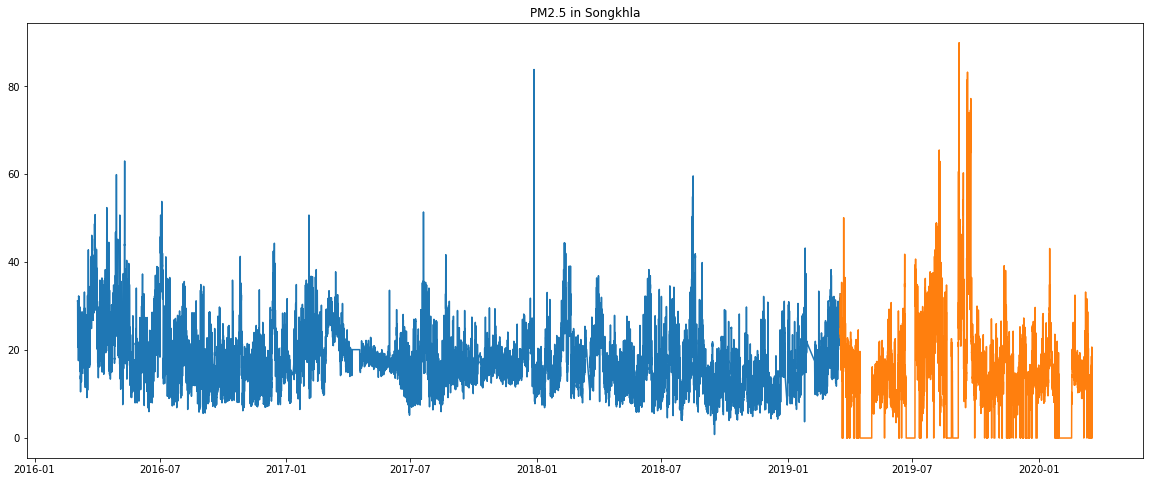

In [ ]:
ska_pm_train = pd.read_csv(os.path.join(path, 'Songkhla/Train/Songkhla.txt'), delimiter = '\t', skiprows=10, header=None,
            names=['year', 'month', 'day', 'UTC hour', 'PM2.5', 'PM10_mask', 'Retrospective'])
ska_pm_train['datetime'] = pd.to_datetime({'year': ska_pm_train['year'], 'month': ska_pm_train['month'], 'day':ska_pm_train['day'],'hour': ska_pm_train['UTC hour']})
drop_columns = ['year', 'month', 'day', 'UTC hour']
ska_pm_train = ska_pm_train.drop(drop_columns, axis=1)
ska_pm_train['datetime'] = ska_pm_train['datetime'].dt.tz_localize('UTC').dt.tz_convert('Asia/Bangkok')
ska_pm_train['datetime'] = ska_pm_train['datetime'].dt.tz_localize(None)
ska_pm_train = ska_pm_train.set_index('datetime')

ska_pm_test = pd.read_csv(os.path.join(path, 'Songkhla/Test/Songkhla.csv'), skiprows=1,
                            names=['datetime', 'PM2.5'])
ska_pm_test['datetime'] = pd.to_datetime(ska_pm_test['datetime'])
ska_pm_test = ska_pm_test.set_index('datetime')

plt.figure(figsize=(20,8))
plt.plot(ska_pm_train['PM2.5'])
plt.plot(ska_pm_test['PM2.5'])
plt.title('PM2.5 in Songkhla')
plt.show()

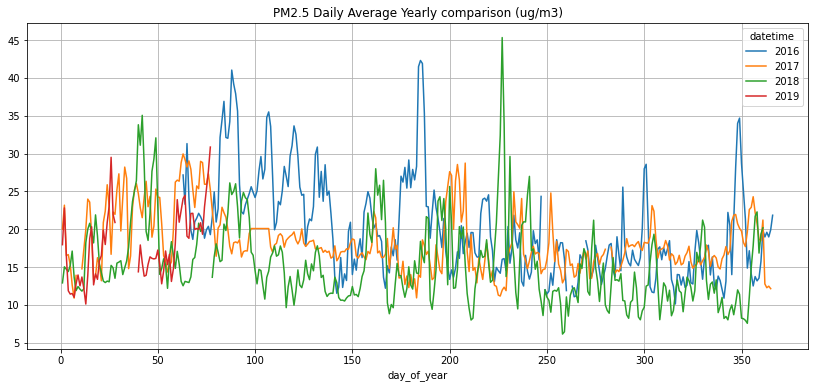

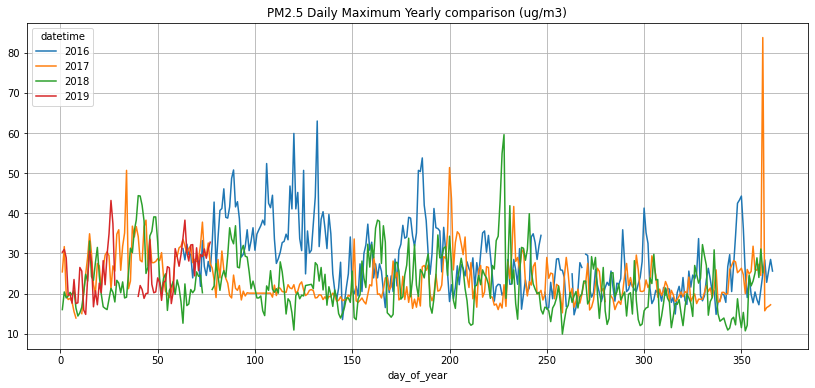

In [ ]:
ska_pm_train = ska_pm_train.reset_index()
ska_pm_train['day_of_year'] = ska_pm_train['datetime'].dt.dayofyear
ska_pm_train['day_of_week'] = ska_pm_train['datetime'].dt.dayofweek
ska_pm_train['hour'] = ska_pm_train['datetime'].dt.hour
ska_pm_train = ska_pm_train.set_index('datetime')

pv = pd.pivot_table(ska_pm_train, index=ska_pm_train['day_of_year'], columns=ska_pm_train.index.year, values='PM2.5', aggfunc='mean')
pv.plot(title="PM2.5 Daily Average Yearly comparison (ug/m3)",figsize=(14,6), grid=True)

pv2 = pd.pivot_table(ska_pm_train, index=ska_pm_train['day_of_year'], columns=ska_pm_train.index.year, values='PM2.5', aggfunc='max')
pv2.plot(title="PM2.5 Daily Maximum Yearly comparison (ug/m3)",figsize=(14,6), grid=True)

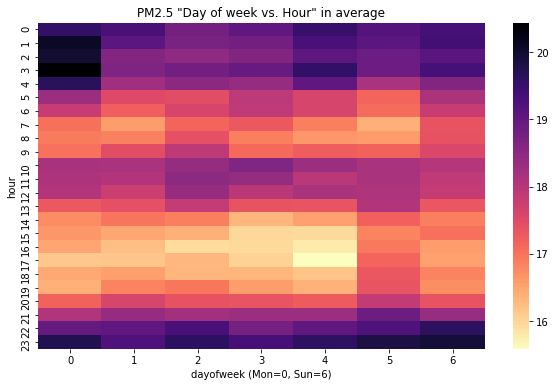

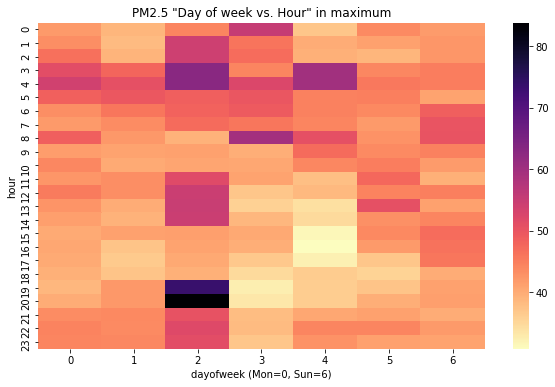

In [ ]:
fig, ax = plt.subplots(figsize=(10,6)) 
hrvsday = ska_pm_train.pivot_table(values='PM2.5',index='hour',columns='day_of_week',aggfunc='mean')
ax.set_title('PM2.5 "Day of week vs. Hour" in average')
sns.heatmap(hrvsday,cmap='magma_r', ax=ax)
ax.set_xlabel('dayofweek (Mon=0, Sun=6)')

fig, ax = plt.subplots(figsize=(10,6)) 
hrvsday = ska_pm_train.pivot_table(values='PM2.5',index='hour',columns='day_of_week',aggfunc='max')
ax.set_title('PM2.5 "Day of week vs. Hour" in maximum')
sns.heatmap(hrvsday,cmap='magma_r', ax=ax)
ax.set_xlabel('dayofweek (Mon=0, Sun=6)')

plt.show()

## Fire hotspot

In [ ]:
fire_th = pd.read_csv(os.path.join(path, 'Fire hotspot', 'viirs-snpp_2016_Thailand.csv'))
fire_th = fire_th.append(pd.read_csv(os.path.join(path, 'Fire hotspot', 'viirs-snpp_2017_Thailand.csv')))
fire_th = fire_th.append(pd.read_csv(os.path.join(path, 'Fire hotspot', 'viirs-snpp_2018_Thailand.csv')))
fire_th = fire_th.append(pd.read_csv(os.path.join(path, 'Fire hotspot', 'viirs-snpp_2019_Thailand.csv')))
fire_th.head(5)

,latitude,longitude,bright_ti4,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_ti5,frp,daynight,type
0,8.934916,98.917755,338.50,0.39,0.36,2016-01-01,648,N,VIIRS,n,1,295.04,4.40,D,0
1,7.783957,99.083443,331.69,0.39,0.36,2016-01-01,648,N,VIIRS,n,1,296.51,10.79,D,0
2,13.502037,99.742729,340.12,0.43,0.38,2016-01-01,649,N,VIIRS,n,1,301.59,3.73,D,0
3,13.505548,99.742218,338.60,0.43,0.38,2016-01-01,649,N,VIIRS,n,1,302.44,6.88,D,0
4,13.453952,99.526886,334.33,0.42,0.38,2016-01-01,649,N,VIIRS,n,1,302.50,3.44,D,0


In [ ]:
fire_th['acq_time'] = ((np.ceil(fire_th['acq_time'] / 100.0)) * 100).astype(int)
fire_th['acq_time'] = fire_th['acq_time'].astype(str)
fire_th['datetime'] = pd.to_datetime(fire_th['acq_date'] + fire_th['acq_time'], format='%Y-%m-%d%H%M')
fire_th['datetime'] = fire_th['datetime'].dt.tz_localize('UTC').dt.tz_convert('Asia/Bangkok')
fire_th['datetime'] = fire_th['datetime'].dt.tz_localize(None)
fire_th['hotspot_count'] = 1
fire_th = fire_th.set_index('datetime')
fire_th = fire_th[['hotspot_count']]
fire_th = fire_th.groupby('datetime').agg({'hotspot_count': 'sum'})
fire_th.head(5)

,hotspot_count
datetime,
2016-01-01 14:00:00,253
2016-01-02 01:00:00,4
2016-01-02 03:00:00,62
2016-01-02 14:00:00,512
2016-01-03 03:00:00,137


In [ ]:
fire_cbd = pd.read_csv(os.path.join(path, 'Fire hotspot', 'viirs-snpp_2016_Cambodia.csv'))
fire_cbd = fire_cbd.append(pd.read_csv(os.path.join(path, 'Fire hotspot', 'viirs-snpp_2017_Cambodia.csv')))
fire_cbd = fire_cbd.append(pd.read_csv(os.path.join(path, 'Fire hotspot', 'viirs-snpp_2018_Cambodia.csv')))
fire_cbd = fire_cbd.append(pd.read_csv(os.path.join(path, 'Fire hotspot', 'viirs-snpp_2019_Cambodia.csv')))
fire_cbd['acq_time'] = ((np.ceil(fire_cbd['acq_time'] / 100.0)) * 100).astype(int)
fire_cbd['acq_time'] = fire_cbd['acq_time'].astype(str)
fire_cbd['datetime'] = pd.to_datetime(fire_cbd['acq_date'] + fire_cbd['acq_time'], format='%Y-%m-%d%H%M')
fire_cbd['datetime'] = fire_cbd['datetime'].dt.tz_localize('UTC').dt.tz_convert('Asia/Bangkok')
fire_cbd['datetime'] = fire_cbd['datetime'].dt.tz_localize(None)
fire_cbd['hotspot_count'] = 1
fire_cbd = fire_cbd.set_index('datetime')
fire_cbd = fire_cbd[['hotspot_count']]
fire_cbd = fire_cbd.groupby('datetime').agg({'hotspot_count': 'sum'})
fire_cbd.head(5)

,hotspot_count
datetime,
2016-01-01 14:00:00,1861
2016-01-02 01:00:00,176
2016-01-02 03:00:00,104
2016-01-02 14:00:00,1447
2016-01-03 03:00:00,92


In [ ]:
fire_lao = pd.read_csv(os.path.join(path, 'Fire hotspot', 'viirs-snpp_2016_Lao_PDR.csv'))
fire_lao = fire_lao.append(pd.read_csv(os.path.join(path, 'Fire hotspot', 'viirs-snpp_2017_Lao_PDR.csv')))
fire_lao = fire_lao.append(pd.read_csv(os.path.join(path, 'Fire hotspot', 'viirs-snpp_2018_Lao_PDR.csv')))
fire_lao = fire_lao.append(pd.read_csv(os.path.join(path, 'Fire hotspot', 'viirs-snpp_2019_Lao_PDR.csv')))
fire_lao['acq_time'] = ((np.ceil(fire_lao['acq_time'] / 100.0)) * 100).astype(int)
fire_lao['acq_time'] = fire_lao['acq_time'].astype(str)
fire_lao['datetime'] = pd.to_datetime(fire_lao['acq_date'] + fire_lao['acq_time'], format='%Y-%m-%d%H%M')
fire_lao['datetime'] = fire_lao['datetime'].dt.tz_localize('UTC').dt.tz_convert('Asia/Bangkok')
fire_lao['datetime'] = fire_lao['datetime'].dt.tz_localize(None)
fire_lao['hotspot_count'] = 1
fire_lao = fire_lao.set_index('datetime')
fire_lao = fire_lao[['hotspot_count']]
fire_lao = fire_lao.groupby('datetime').agg({'hotspot_count': 'sum'})
fire_lao.head(5)

,hotspot_count
datetime,
2016-01-01 14:00:00,46
2016-01-02 01:00:00,1
2016-01-02 03:00:00,3
2016-01-02 14:00:00,114
2016-01-03 03:00:00,5


In [ ]:
fire_mm = pd.read_csv(os.path.join(path, 'Fire hotspot', 'viirs-snpp_2016_Myanmar.csv'))
fire_mm = fire_mm.append(pd.read_csv(os.path.join(path, 'Fire hotspot', 'viirs-snpp_2017_Myanmar.csv')))
fire_mm = fire_mm.append(pd.read_csv(os.path.join(path, 'Fire hotspot', 'viirs-snpp_2018_Myanmar.csv')))
fire_mm = fire_mm.append(pd.read_csv(os.path.join(path, 'Fire hotspot', 'viirs-snpp_2019_Myanmar.csv')))
fire_mm['acq_time'] = ((np.ceil(fire_mm['acq_time'] / 100.0)) * 100).astype(int)
fire_mm['acq_time'] = fire_mm['acq_time'].astype(str)
fire_mm['datetime'] = pd.to_datetime(fire_mm['acq_date'] + fire_mm['acq_time'], format='%Y-%m-%d%H%M')
fire_mm['datetime'] = fire_mm['datetime'].dt.tz_localize('UTC').dt.tz_convert('Asia/Bangkok')
fire_mm['datetime'] = fire_mm['datetime'].dt.tz_localize(None)
fire_mm['hotspot_count'] = 1
fire_mm = fire_mm.set_index('datetime')
fire_mm = fire_mm[['hotspot_count']]
fire_mm = fire_mm.groupby('datetime').agg({'hotspot_count': 'sum'})
fire_mm.head(5)

,hotspot_count
datetime,
2016-01-01 14:00:00,173
2016-01-02 03:00:00,33
2016-01-02 14:00:00,137
2016-01-03 03:00:00,37
2016-01-03 14:00:00,81


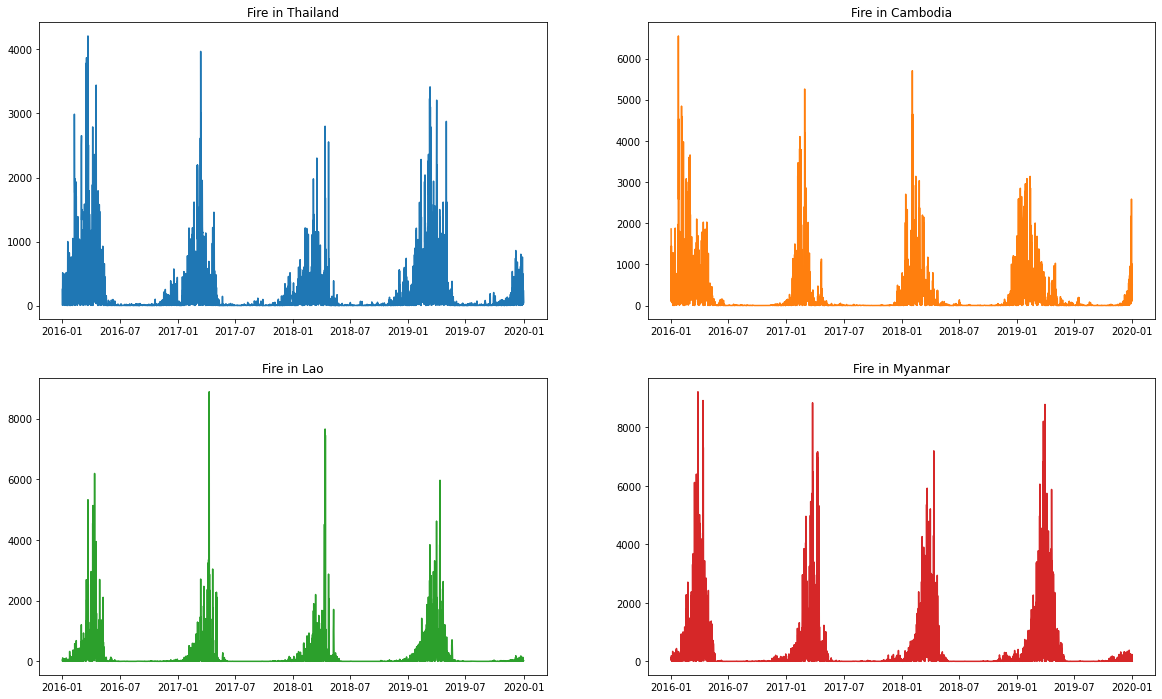

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(20,12))
axs[0, 0].plot(fire_th)
axs[0, 0].set_title('Fire in Thailand')
axs[0, 1].plot(fire_cbd, 'tab:orange')
axs[0, 1].set_title('Fire in Cambodia')
axs[1, 0].plot(fire_lao, 'tab:green')
axs[1, 0].set_title('Fire in Lao')
axs[1, 1].plot(fire_mm, 'tab:red')
axs[1, 1].set_title('Fire in Myanmar')
plt.show()

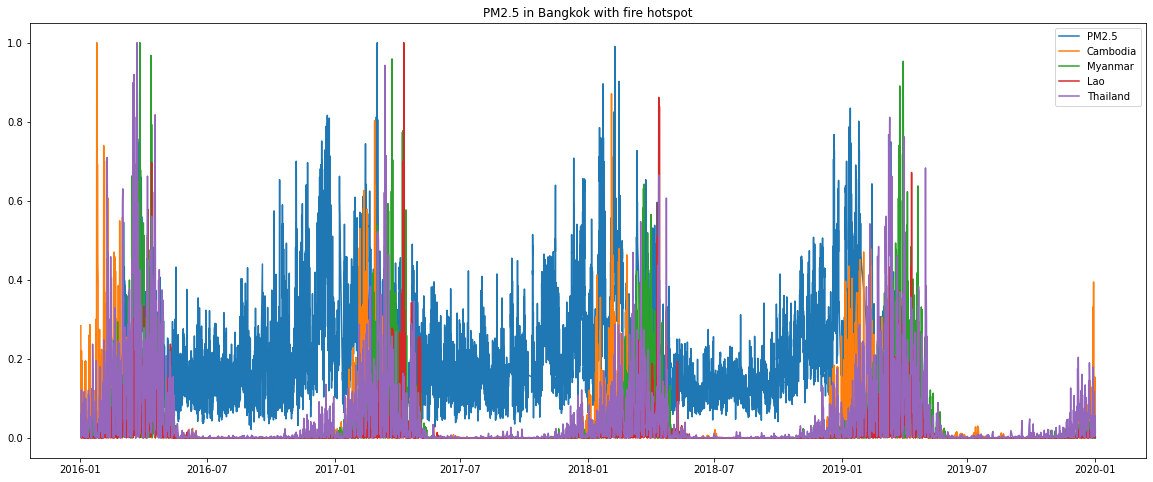

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(bkk_pm_train['PM2.5'] / bkk_pm_train['PM2.5'].max(), label='PM2.5')
plt.plot(fire_cbd / fire_cbd.max(), label='Cambodia')
plt.plot(fire_mm / fire_mm.max(), label='Myanmar')
plt.plot(fire_lao / fire_lao.max(), label='Lao')
plt.plot(fire_th / fire_th.max(), label='Thailand')
plt.title('PM2.5 in Bangkok with fire hotspot')
plt.legend()
plt.show()

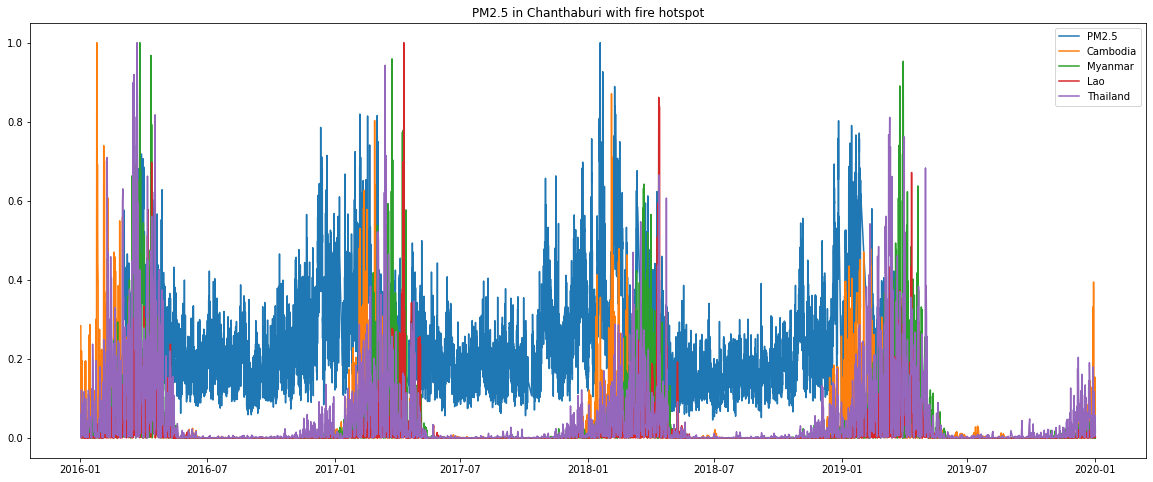

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(cti_pm_train['PM2.5'] / cti_pm_train['PM2.5'].max(), label='PM2.5')
plt.plot(fire_cbd / fire_cbd.max(), label='Cambodia')
plt.plot(fire_mm / fire_mm.max(), label='Myanmar')
plt.plot(fire_lao / fire_lao.max(), label='Lao')
plt.plot(fire_th / fire_th.max(), label='Thailand')
plt.title('PM2.5 in Chanthaburi with fire hotspot')
plt.legend()
plt.show()

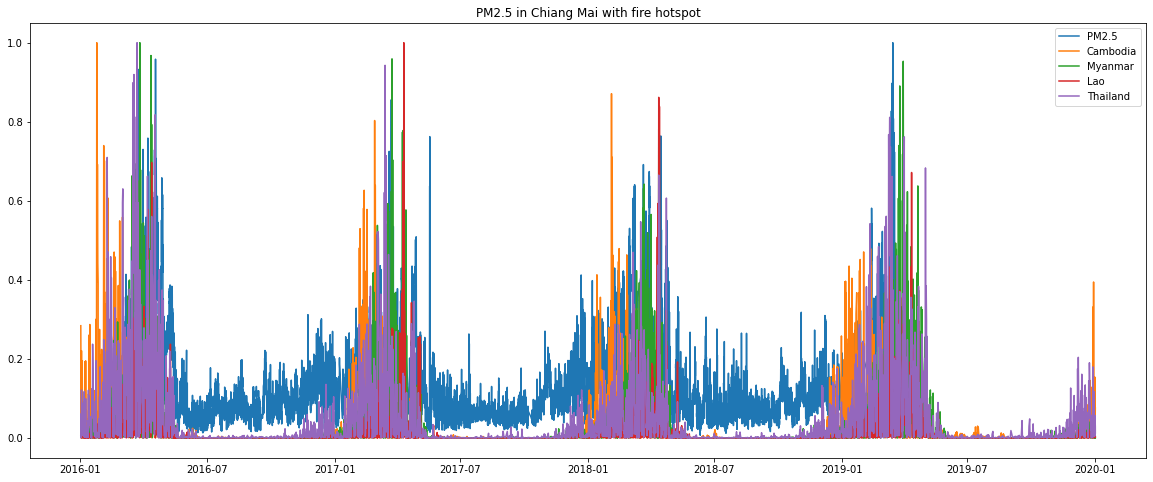

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(cmi_pm_train['PM2.5'] / cmi_pm_train['PM2.5'].max(), label='PM2.5')
plt.plot(fire_cbd / fire_cbd.max(), label='Cambodia')
plt.plot(fire_mm / fire_mm.max(), label='Myanmar')
plt.plot(fire_lao / fire_lao.max(), label='Lao')
plt.plot(fire_th / fire_th.max(), label='Thailand')
plt.title('PM2.5 in Chiang Mai with fire hotspot')
plt.legend()
plt.show()

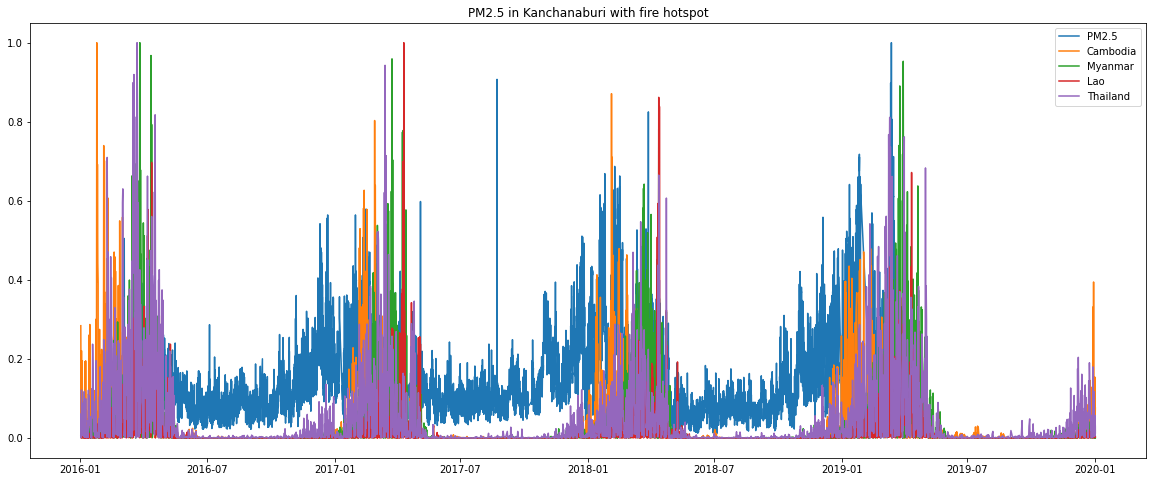

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(kri_pm_train['PM2.5'] / kri_pm_train['PM2.5'].max(), label='PM2.5')
plt.plot(fire_cbd / fire_cbd.max(), label='Cambodia')
plt.plot(fire_mm / fire_mm.max(), label='Myanmar')
plt.plot(fire_lao / fire_lao.max(), label='Lao')
plt.plot(fire_th / fire_th.max(), label='Thailand')
plt.title('PM2.5 in Kanchanaburi with fire hotspot')
plt.legend()
plt.show()

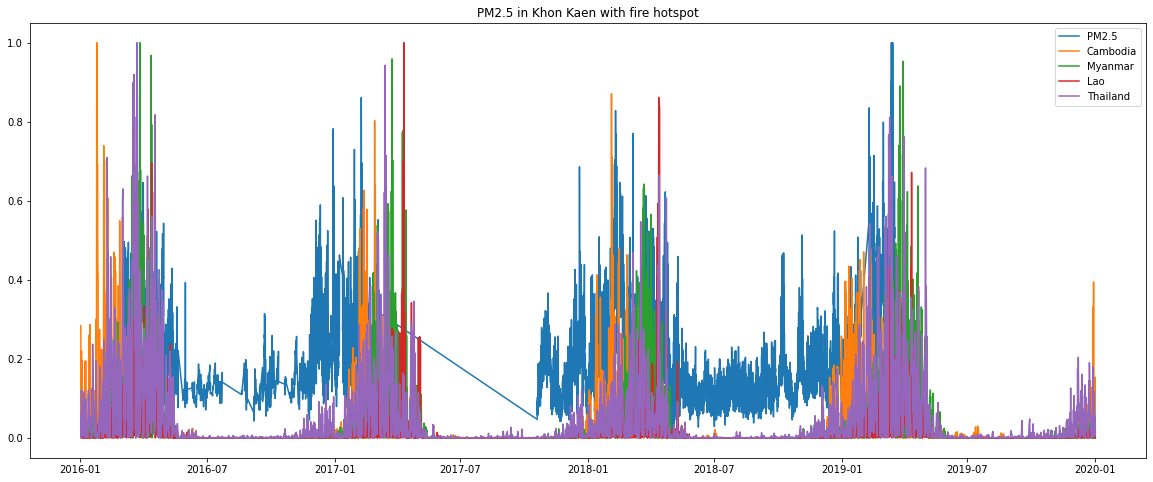

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(kkn_pm_train['PM2.5'] / kkn_pm_train['PM2.5'].max(), label='PM2.5')
plt.plot(fire_cbd / fire_cbd.max(), label='Cambodia')
plt.plot(fire_mm / fire_mm.max(), label='Myanmar')
plt.plot(fire_lao / fire_lao.max(), label='Lao')
plt.plot(fire_th / fire_th.max(), label='Thailand')
plt.title('PM2.5 in Khon Kaen with fire hotspot')
plt.legend()
plt.show()

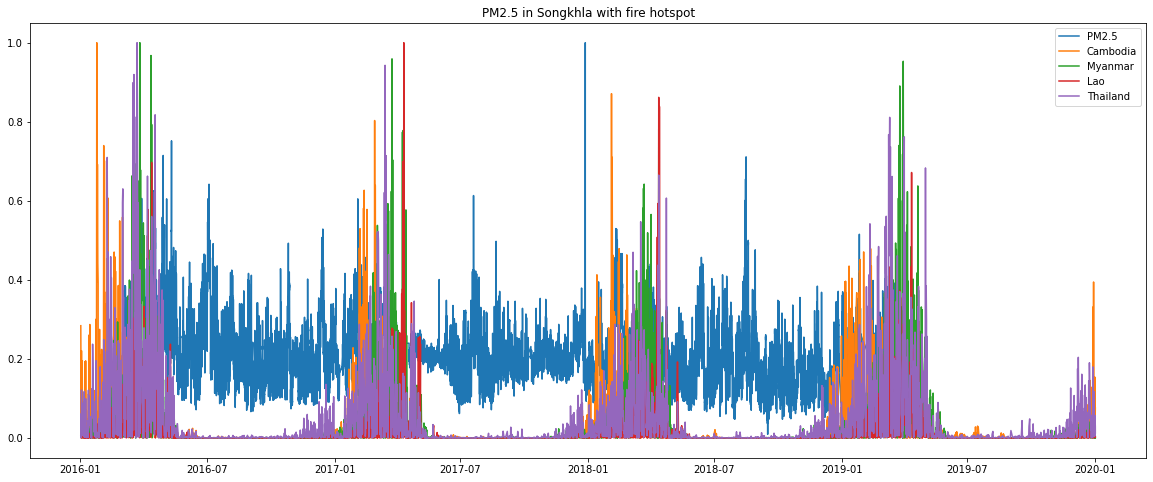

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(ska_pm_train['PM2.5'] / ska_pm_train['PM2.5'].max(), label='PM2.5')
plt.plot(fire_cbd / fire_cbd.max(), label='Cambodia')
plt.plot(fire_mm / fire_mm.max(), label='Myanmar')
plt.plot(fire_lao / fire_lao.max(), label='Lao')
plt.plot(fire_th / fire_th.max(), label='Thailand')
plt.title('PM2.5 in Songkhla with fire hotspot')
plt.legend()
plt.show()

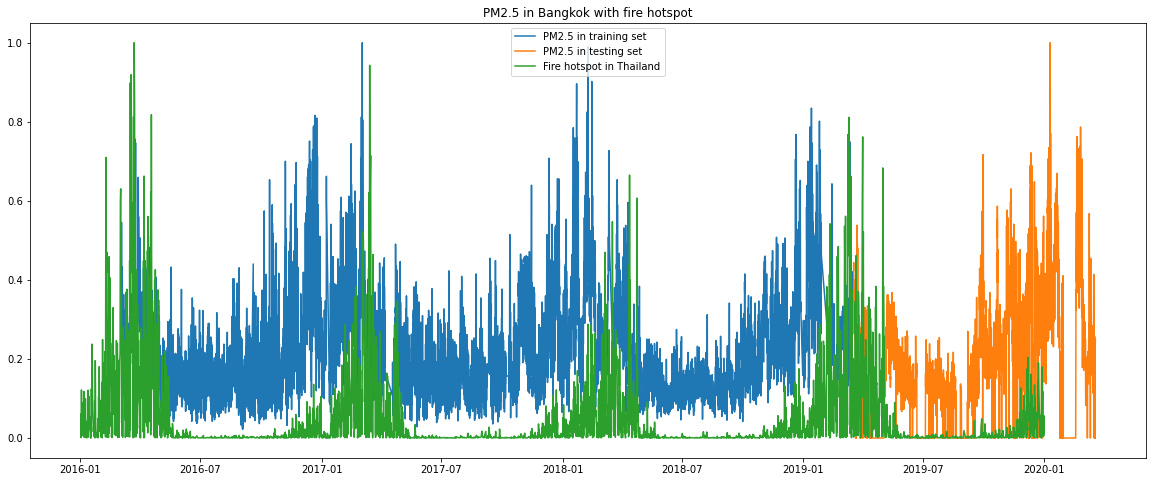

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(bkk_pm_train['PM2.5'] / bkk_pm_train['PM2.5'].max(), label='PM2.5 in training set')
plt.plot(bkk_pm_test['PM2.5'] / bkk_pm_test['PM2.5'].max(), label='PM2.5 in testing set')
plt.plot(fire_th / fire_th.max(), label='Fire hotspot in Thailand')
plt.title('PM2.5 in Bangkok with fire hotspot')
plt.legend()
plt.show()